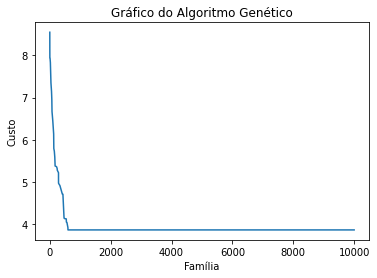

Tamanho da População: 20
Taxa de Mutação: 5
Número de Cidades: 20
Melhor Custo: 3.8640914768717542
Melhor Solução: [14, 18, 8, 15, 2, 12, 9, 0, 1, 7, 10, 11, 19, 5, 16, 17, 6, 4, 13, 3, 14]


In [ ]:
import random
import numpy as np
import math
import sys
from pylab import plot, show, title, xlabel, ylabel


taxa_de_mutacao = 5 # taxa em porcentagem 1 - 100
quantidade_iteracoes = 10000 # Quantidade de gerações que serão executadas
distancia_cidades = [] # Array que irá conter os valores calculados das distâncias entre as cidades
cromossos = []
qtd_cromossomos = 20
qtd_cidades = 20
score_cromossos = []
tabela_roleta = [
                 9,
                 8, 8,
                 7, 7, 7,
                 6, 6, 6, 6,
                 5, 5, 5, 5, 5,
                 4, 4, 4, 4, 4, 4,
                 3, 3, 3, 3, 3, 3, 3,
                 2, 2, 2, 2, 2, 2, 2, 2,
                 1, 1, 1, 1, 1, 1, 1, 1, 1,
                 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] # Tabela que controla as chances de cada cromosso ser escolhido para a próxima geração
cromossos_selecionados = []
x = []
y = []
grafico_x = []
grafico_y = []
ultimo_melhor_valor = 99999999999999

# Iniciando a matriz com valores aleatórios
def init_matriz():
  global cromossos
  for cromossomo in range(qtd_cromossomos):
    cromossoList = []
    cidades = []
    for i in range(qtd_cidades):
      cidades.append(i)

    for gene in range(qtd_cidades):
      cidadeAleatoria = random.choice(cidades)
      cidades.remove(cidadeAleatoria)
      cromossoList.append(cidadeAleatoria)
    cromossoList.append(cromossoList[0]) # Adicionando ponto de inicio no final, o caixeiro deve retornar ao ponto inicial
    cromossos.append(cromossoList)

def fill_matriz():
  data = np.loadtxt('cidades.mat')
  global x
  global y
  x = data[0]
  y = data[1]

# Calculando a distancia dos pontos entre as cidades dos cromossomos
def calcular_distancia():
  global distancia_cidades # Criando matriz para guardar as distâncias entre cada cidade dos cromossomos
  distancia_cidades.clear()
  for i in range(qtd_cromossomos):
    distancia_cidades_list = []
    for j in range(qtd_cidades):
      p1 = cromossos[i][j]
      p2 = cromossos[i][j+1]

      dist = math.sqrt(((x[p1]-x[p2])**2)+((y[p1]-y[p2])**2)) # Calculando a distância entre cada cidade aqui e colocando na matriz da distância
      distancia_cidades_list.append(dist)
    distancia_cidades.append(distancia_cidades_list)

# Somando as distâncias calculadas entre as cidades e gerando a lista de score dos cromossomos
def somar_distancias():
  global score_cromossos
  score_cromossos.clear()
  for i in distancia_cidades:
    distancia_cidades_soma = 0
    for distanciaCidade in i:
      distancia_cidades_soma = distancia_cidades_soma + distanciaCidade # Soma das distâncias dos cromossomos
    score_cromossos.append(distancia_cidades_soma) # Gerando a lista de score

# Ordenando as matrizes dos cromossomos e scores usando método bubble
def ordenar_cromossos_scores():
  global score_cromossos, cromossos
  for i in range(len(score_cromossos)-1, 0, -1):
    for j in range(i):
      if score_cromossos[j] > score_cromossos[j+1]: # Encontrou score para ocupar a posição mais a frente
        score_cromosso_temp = score_cromossos[j] # Movendo o score pra frente da lista
        score_cromossos[j] = score_cromossos[j+1]
        score_cromossos[j+1] = score_cromosso_temp

        cromosso_temp = cromossos[j] # Movendo o cromossomo pra frente da lista
        cromossos[j] = cromossos[j+1]
        cromossos[j+1] = cromosso_temp

# Constroi lista de cromossos baseada na lista de cromossomos gerado pela roleta
def selecionar_lista_roleta():
  global tabela_roleta, cromossos_selecionados
  tabela_roleta_copy = tabela_roleta.copy()
  cromossos_selecionados = []
  while(len(cromossos_selecionados) != 10):
    num_cromosso_selecao = random.choice(tabela_roleta_copy)
    cromossos_selecionados.append(num_cromosso_selecao)

# Substitui a lista dos cromossos pelos cromossomos selecionados pela roleta
def criar_lista_pais_selecionados():
  global cromossos, cromossos_selecionados, score_cromossos
  cromossos_copy = []
  for cromosso_selecionado in cromossos_selecionados:
    cromossos_copy.append(cromossos[cromosso_selecionado])
  cromossos = cromossos_copy

# Método usado para trocar os valores em casas expecificas nos descendentes
def trocar_valores_descendentes(descendente_1, descendente_2, posicao):
  valor_temp = descendente_1[posicao]
  descendente_1[posicao] = descendente_2[posicao]
  descendente_2[posicao] = valor_temp

# Metodo que valida se o cromossos possui valor repetido(como se a mesma cidade fosse visitada duas vezes)
def validar_se_repete_valor(array, posicao):
  valor_posicao = array[posicao]
  posicao_valor_repetido = -1
  for i in range(len(array)):
    valor = array[i]
    if valor == valor_posicao and i != posicao:
      posicao_valor_repetido = i
      break
  return posicao_valor_repetido

# Método que executa a técnica de cycle
def cycle(descendente_1, descendente_2, posicao_troca):
  trocar_valores_descendentes(descendente_1, descendente_2, posicao_troca)
  posicao_valor_repetido = validar_se_repete_valor(descendente_1, posicao_troca)
  if posicao_valor_repetido != -1:
    cycle(descendente_1, descendente_2, posicao_valor_repetido)
  else:
    posicao_valor_repetido = validar_se_repete_valor(descendente_2, posicao_troca)
    if posicao_valor_repetido != -1:
      cycle(descendente_1, descendente_2, posicao_valor_repetido)

# Método que executada a mutação fazendo o chance de ser ou não executada alguma troca
def mutacao(descendente):
  num_random = random.randint(1, 100)
  if num_random <= taxa_de_mutacao:
    cidade_1 = random.randint(0, 19)
    cidade_2 = -1
    while True:
      cidade_2 = random.randint(0, 19)
      if cidade_1 != cidade_2:
        break

    cidade_temp = descendente[cidade_1]
    descendente[cidade_1] = descendente[cidade_2]
    descendente[cidade_2] = cidade_temp

# Cria descendentes para a próxima geração usando a técnica de cycle e mutação
def criar_descendentes():
  global cromossos
  for i in range(0, 10, 2):
    posicao_randomica = random.randint(0, 19)
    descendente_1 = cromossos[i].copy()
    descendente_1.pop(qtd_cidades)
    descendente_2 = cromossos[i+1].copy()
    descendente_2.pop(qtd_cidades)
    cycle(descendente_1, descendente_2, posicao_randomica)
    mutacao(descendente_1)
    descendente_1.append(descendente_1[0])
    cromossos.append(descendente_1)
    mutacao(descendente_2)
    descendente_2.append(descendente_2[0])
    cromossos.append(descendente_2)

# Coloca um ponto no gráfico toda vez que um novo melhor valor é encontrado, também é gravado a ultima execução para o gráfico sempre mostrar todas as iterações no eixo x
def marcar_no_grafico(iteracao, forca_entrada):
  global score_cromossos, ultimo_melhor_valor
  melhor_valor_score = score_cromossos[0]
  if melhor_valor_score < ultimo_melhor_valor:
    ultimo_melhor_valor = melhor_valor_score
    grafico_x.append(iteracao)
    grafico_y.append(melhor_valor_score)
  elif forca_entrada:
    grafico_x.append(iteracao)
    grafico_y.append(ultimo_melhor_valor)

# Cria o gráfico realmente e exibe ele no console
def criar_grafico():
  plot(grafico_x, grafico_y)
  title('Gráfico do Algoritmo Genético')
  xlabel('Família')
  ylabel('Custo')
  show()


# Trecho de código que será iterado quantas vezes for necessário, sendo cada repetição do 'for' uma geração nova
init_matriz()
fill_matriz()
for i in range(quantidade_iteracoes):
  calcular_distancia()
  somar_distancias()
  ordenar_cromossos_scores()
  marcar_no_grafico(i, False)
  selecionar_lista_roleta()
  criar_lista_pais_selecionados()
  criar_descendentes()

calcular_distancia()
somar_distancias()
ordenar_cromossos_scores()
marcar_no_grafico(quantidade_iteracoes, True)
criar_grafico()
# Fim do trecho

# Exibição dos resultados
print('Tamanho da População:', qtd_cromossomos)
print('Taxa de Mutação:', taxa_de_mutacao)
print('Número de Cidades:', qtd_cidades)
print('Melhor Custo:', score_cromossos[0])
print('Melhor Solução:', cromossos[0])



# Exibir arquivo

In [ ]:
import numpy as np

data = np.loadtxt('cidades.mat')

print(data)

[[0.77687122 0.55726533 0.65639441 0.60439895 0.10984792 0.30681839
  0.03642046 0.50750194 0.79819788 0.79896875 0.1432694  0.07110193
  0.7261315  0.22624105 0.62480412 0.54832279 0.39699388 0.07545496
  0.67595097 0.07429705]
 [0.2794392  0.11661366 0.39053913 0.66616904 0.69857584 0.20730006
  0.50247213 0.07393869 0.67991802 0.39749278 0.14151256 0.12773617
  0.3719729  0.69033435 0.91890348 0.52333815 0.42525695 0.37166915
  0.99033329 0.15694232]]


# Nova seção

In [ ]:
import sys

print(sys.version)


3.7.15 (default, Oct 12 2022, 19:14:55) 
[GCC 7.5.0]
